# 1 Mise en place des fonctions de travail 

In [6]:
import random
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg

# Import new magic commands
%load_ext line_profiler

def u_array(debug=False, N=21):
    """
    Retourne un tableau non trie avec des valeur de 1 <= i < N .
    Par defaut un tableau  1 <= i < 21
    
    Pour tester vos algorithmes, vous pouvez passer l'argument debug=True
    dans ce cas, l'algorithme vous donne toujour le meme tableau :
    
    [3, 9, 7, 1, 6, 2, 8, 4, 5]
    
    """
    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5, 10]
    
    array = list(range(1,N))
    random.shuffle(array)

    return array

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [3]:
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]
    
def is_sorted(A:list) -> bool:
    is_sorted=True
    for i in range(0, len(A)-1):
        if not A[i+1] > A[i]:
            is_sorted=False
    return is_sorted

# 2 Les tris recursif 

## 2.1 Tri quick sort

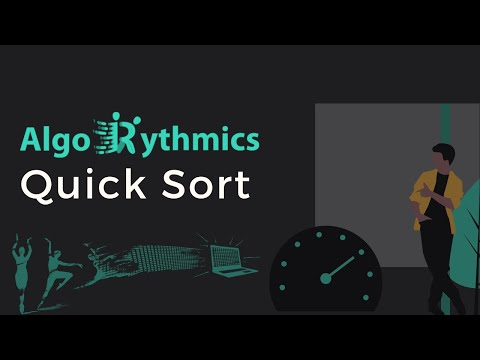

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ywWBy6J5gz8', height=600, width=900)

**Un pseudocode possible** 

```
tri_rapide(tableau T, entier nb):
    tri_rapide_recursif(T,0,nb-1)
    
    ex tri_rapide_recursif(A, 0, 10)


tri_rapide_recursif(tableau T, entier premier, entier dernier)
    
    premier = 0
    dernier = 10
    A
    
    si premier < dernier alors
        pivot := partitionner(T, premier, dernier)
        
        ex : partionner(A, 0, 10) -> pivot
        
        tri_rapide_recursif(T, premier, pivot-1)
        tri_rapide_recursif(T, pivot+1, dernier)
    fin si


partitionner(tableau T, entier premier, entier dernier)

    on recoit : A, 0 et 10

    pivot := T[premier] --> A[0]
    i := premier = 0
    j := dernier = 10
    
    tant que i <= j faire
        si T[i] <= pivot alors 
            i := i+1
        sinon
            si T[j] > pivot alors
                j := j-1 
            sinon
                echanger(T[i],T[j])
            finsi 
        finsi
    fin tant que
    echanger(t[first],t[j])
    
    retourner j      
```

In [63]:
def quick_sort(A):
    iteration = 0
    print(A)
    quick_sort_r(A, 0, len(A)-1, iteration)
    print(A)

def quick_sort_r(A, first, last, iteration):
    # print(f"Called recursive with : {A} - first --> {first} <-- last --> {last} <-- ")
    #print(f"Iteration n° {iteration}")
    iteration += 1
    # On compare les indices envoyé
    # En premier lieu, les indices recus sont 0 et len()-a
    # Si len()-1 = 0 on a donc une liste de taille 1 et il n'y a rien a faire


    if first < last:
        # Si mes indices et j verifient i < j
        #
        
        pivot = partition(A, first, last)
        quick_sort_r(A, first, pivot-1, iteration)
        quick_sort_r(A, pivot+1, last, iteration)
    # else:
        # print(f"{last} < {first}")
        
def partition(A, first, last):
    # Apres avoir validé : i < j
    # On calcule le pivot
    pivot = A[first]
    # print(f"The pivot is --> {pivot} <--")
    i = first
    j = last
    
    # Je balaye a partir de mon pivot car au debut i = first et pivot = A[first]
    while i <= j:
        # Si l'indice a[i] est inferieur au pivot, il est a la bonne place ie, entre l'indice du pivot et i
        if A[i] <= pivot:
            i += 1
        else:
            # Mais s'il est plus grand, sont indices devrait etre entre i et j, on le change bde place
            # Si a[j] > pivot, il est la bonne place
            # On peut donc le laisser ici, ocnsierer que c'est ok
            # On reduit j pour rapprocher de i et finir l algo
            if A[j] > pivot:
                j -= 1
            else:
                A[i], A[j] = A[j], A[i]
    # Maintenant qu'on a classer tout les < pivot entre pivot et i
    # Tous les > p entre i et +
    # Il faut positioner le pivot entre ces deux partitions
    # Note : J dimininue si > stric. Donc au dela de j on est ok. = a j on est plus petit
    
    A[first], A[j] = A[j], A[first]
    # print(f"----> The new table after sorting around pivot {pivot} --> {A}")
    return j
    
    
    
    
    
    
    

In [64]:
quick_sort(u_array(False, 1000))

[500, 173, 852, 142, 21, 749, 248, 67, 171, 798, 773, 398, 640, 701, 462, 100, 781, 594, 338, 523, 136, 174, 687, 306, 961, 919, 181, 839, 326, 766, 862, 558, 351, 341, 329, 325, 349, 750, 265, 271, 735, 79, 73, 316, 197, 434, 627, 17, 227, 247, 914, 124, 681, 293, 396, 769, 572, 441, 837, 495, 632, 114, 145, 939, 238, 259, 378, 962, 332, 728, 224, 118, 483, 659, 457, 455, 513, 58, 847, 403, 274, 185, 595, 893, 738, 489, 940, 218, 740, 195, 39, 877, 203, 291, 897, 345, 628, 804, 620, 22, 418, 797, 825, 744, 936, 429, 538, 41, 565, 445, 499, 463, 892, 840, 393, 209, 614, 793, 59, 618, 588, 970, 575, 577, 806, 210, 924, 365, 842, 331, 823, 689, 636, 6, 886, 461, 525, 284, 737, 815, 536, 691, 412, 443, 421, 757, 563, 477, 264, 726, 967, 916, 546, 898, 850, 205, 991, 219, 53, 121, 465, 679, 508, 290, 615, 386, 869, 767, 709, 807, 200, 246, 547, 346, 48, 902, 143, 176, 965, 45, 698, 152, 883, 401, 302, 700, 712, 422, 814, 578, 60, 795, 353, 207, 779, 599, 37, 198, 268, 354, 372, 901, 739, 8

## 2.2 Merge Sort

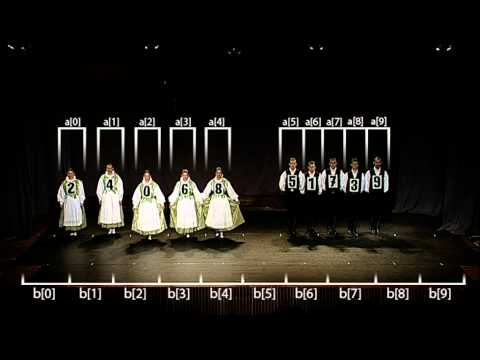

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('XaqR3G_NVoo', height=600, width=900)

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_fusion (E/S t :Tableau[1..MAX] d’Entier,E nb :Naturel) 
debut
    tri_fusion_recursif(t,0,nb)
fin

procedure tri_fusion_recursif (E/S t :Tableau[1..MAX] d’Entier,E d,f :Naturel) 
debut
    si d < f - 1  alors
        m = (d+f) div 2
        tri_fusion_recursif(t,d, m) 
        tri_fusion_recursif(t, m+1,f) 
        fusionnner(t,d,m,f)
    finsi
fin

procedure fusionner (E/S t : Tableau[1..MAX] d’Entier ; E debut,milieu,fin : Naturel) 
    Declaration i,j,k : Naturel,
                 temp : Tableau[1..MAX] d’Entier
debut
    i ← debut
    j ← milieu
    pour k ← debut a fin faire
        si i < milieu et j <fin alors 
            si t[i] <= t[j] alors
                temp[k] ← t[i]
                i ← i+1 
            sinon
                temp[k] ← t[j]
                j ← j+1 
            finsi
        sinon
            si i < milieu alors
                temp[k] ← t[i]
                i ← i+1 
            sinon
                temp[k] ← t[j]
                j ← j+1 
            finsi
        finsi
    fin pour
    
    pour k ← debut à fin faire 
        t[k] ← temp[k]
    fin pour
fin
    
```

In [9]:
def merge_sort(A):
    """
    l'intelligence se trouve dans la fusion des tableaux
    """
    merge_sort_r(A, 0, len(A))
    
    raise NotImplementedError

def merge_sort_r(A, start, end):
    raise NotImplementedError

def merge(A, start, middle, end):
    raise NotImplementedError

In [148]:
merge_sort(u_array(debug=False))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# 3 Procedure ou fonction ?

In [150]:
# Python functions
A = u_array()
print(id(A)) 
A.sort()
print(id(A), id(sorted(A)))

4421223440
4421223440 4423336256
